In [80]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import seaborn as sns
from PIL import Image
import numpy as np

In [41]:
data = pd.read_pickle('./dylan/dtm_tfidf.pkl')
data.head()

,abandoned,abe,abel,abide,abidin,ablazin,able,ableedin,ablowin,abound,...,younger,your,youre,yours,yourself,youth,youve,yuh,zanzinger,zero
song,,,,,,,,,,,,,,,,,,,,,
The Ballad of Frankie Lee and Judas Priest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.032754,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
As I Went Out One Morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All Along the Watchtower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Dreamed I Saw St. Augustine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.066598,0.044127,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wicked Messenger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
dylan_df = pd.read_pickle('./dylan/corpus.pkl')
dylan_df['word_count'] = dylan_df['lyrics'].apply(lambda x: len(x.split()))
dylan_df.head()

,song,album,lyrics,year,genre,word_count
0,The Ballad of Frankie Lee and Judas Priest,John Wesley Harding,well frankie lee and judas priest they were th...,1967,Country,545
1,As I Went Out One Morning,John Wesley Harding,as i went out one morning to breathe the air a...,1967,Country,140
2,All Along the Watchtower,John Wesley Harding,there must be some way out of here said the jo...,1967,Country,130
3,I Dreamed I Saw St. Augustine,John Wesley Harding,i dreamed i saw st augustine alive as you or m...,1967,Country,133
4,The Wicked Messenger,John Wesley Harding,there was a wicked messenger from eli he did c...,1967,Country,125


In [43]:
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [44]:
words = get_top_n_words(dylan_df['lyrics'],10)

In [77]:
folk = dylan_df[dylan_df.genre == 'Folk']
rock = dylan_df[dylan_df.genre == 'Rock']
country = dylan_df[dylan_df.genre == 'Country']

In [222]:
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction import text

In [47]:
add_stop_words = ['the', 'and', 'of', 'wa','said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [256]:
dylan_mask = np.array(Image.open('./dylan.jpeg'))
wc = WordCloud(mask=dylan_mask, stopwords=stop_words, mode='RGBA',background_color='white')

In [257]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

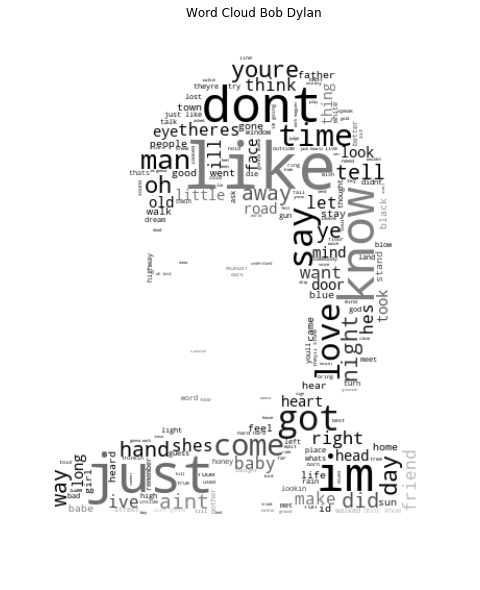

In [278]:
wc = WordCloud(mask=dylan_mask, stopwords=stop_words, mode='RGBA',background_color='white').generate(" ".join(dylan_df['lyrics']))
#rock_wc = wc.generate(" ".join(rock['lyrics']))
#country_wc = wc.generate(" ".join(country['lyrics']))
image_colors = ImageColorGenerator(dylan_mask)
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Word Cloud Bob Dylan")
#plt.show()
plt.savefig("dylan/dylan_wordcloud.png", format="png")

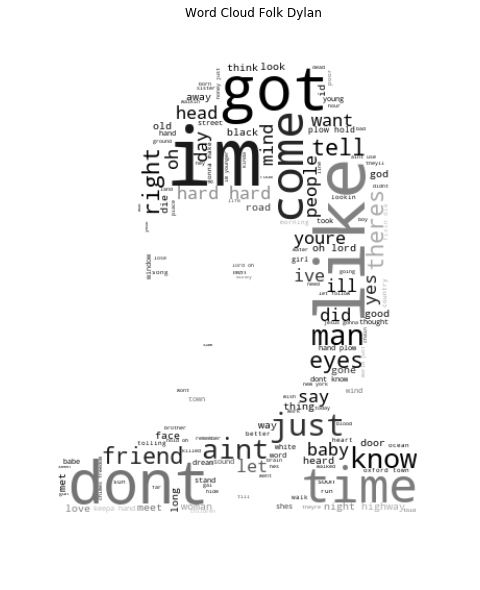

In [272]:
folk_wc = WordCloud(mask=dylan_mask, stopwords=stop_words, mode='RGBA',background_color='white').generate(" ".join(folk['lyrics']))
#rock_wc = wc.generate(" ".join(rock['lyrics']))
#country_wc = wc.generate(" ".join(country['lyrics']))
image_colors = ImageColorGenerator(dylan_mask)
plt.figure(figsize=[10,10])
plt.imshow(folk_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Word Cloud Folk Dylan")
#plt.show()
plt.savefig("dylan/folk_dylan.png", format="png")

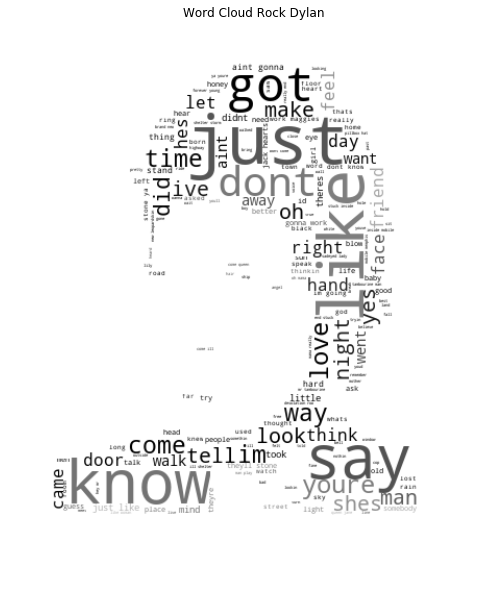

In [275]:
rock_wc = WordCloud(mask=dylan_mask, stopwords=stop_words, mode='RGBA',background_color='white').generate(" ".join(rock['lyrics']))
#rock_wc = wc.generate(" ".join(rock['lyrics']))
#country_wc = wc.generate(" ".join(country['lyrics']))
image_colors = ImageColorGenerator(dylan_mask)
plt.figure(figsize=[10,10])
plt.imshow(rock_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Rock Dylan")
plt.margins(x=0, y=0)
#plt.show()
plt.savefig("dylan/rock_dylan.png", format="png")

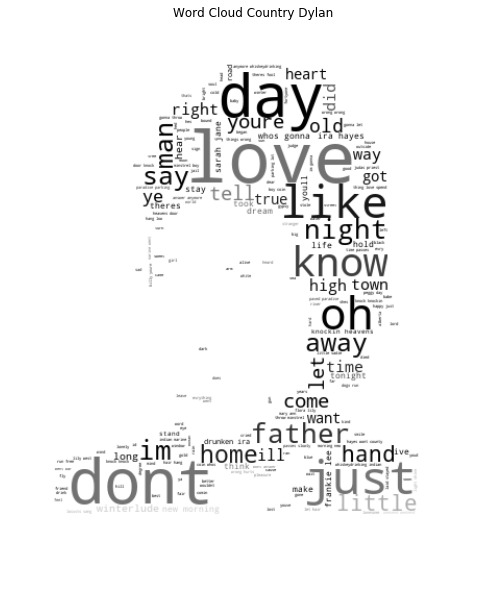

In [276]:
country_wc = WordCloud(mask=dylan_mask, stopwords=stop_words, mode='RGBA',background_color='white').generate(" ".join(country['lyrics']))
#rock_wc = wc.generate(" ".join(rock['lyrics']))
#country_wc = wc.generate(" ".join(country['lyrics']))
image_colors = ImageColorGenerator(dylan_mask)
plt.figure(figsize=[10,10])
plt.imshow(country_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Country Dylan")
plt.margins(x=0, y=0)
#plt.show()
plt.savefig("dylan/country_dylan.png", format="png")

In [51]:
data = data.transpose()
unique_list = []
for song in data.columns:
    uniques = data[song].nonzero()[0].size
    unique_list.append(uniques)
        
songs = data.columns
word_count = list(dylan_df.word_count)
data_words = pd.DataFrame(list(zip(songs, unique_list)), columns=['song', 'unique_words'])
data_words = data_words.sort_values(by='unique_words', ascending=False)

In [52]:
data_words.head()

,song,unique_words
165,"Lily, Rosemary and the Jack of Hearts",395
158,Hurricane,379
83,"It's Alright, Ma (I'm Only Bleeding)",377
57,Desolation Row,357
85,Bob Dylan's 115th Dream,340


In [53]:
combined = pd.merge(data_words, dylan_df, on='song')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

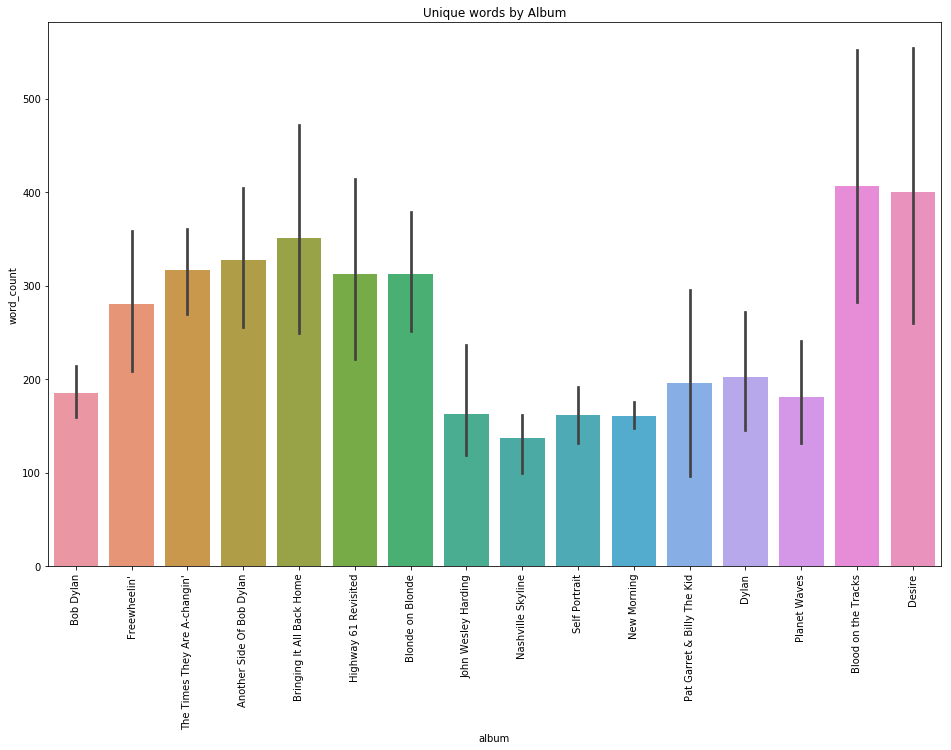

In [133]:
fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(x='album', y = 'word_count', data=dylan_df, ax=ax, order=["Bob Dylan",
                                                                        "Freewheelin'",
                                                                       "The Times They Are A-changin'",
                                                                        "Another Side Of Bob Dylan",
                                                                       "Bringing It All Back Home",
                                                                       "Highway 61 Revisited",
                                                                       "Blonde on Blonde",
                                                                        "John Wesley Harding",
                                                                       "Nashville Skyline",
                                                                       "Self Portrait",
                                                                       "New Morning",
                                                                       "Pat Garret & Billy The Kid",
                                                                       "Dylan",
                                                                       "Planet Waves",
                                                                       "Blood on the Tracks",
                                                                       "Desire"])
ax.set_title("Unique words by Album")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

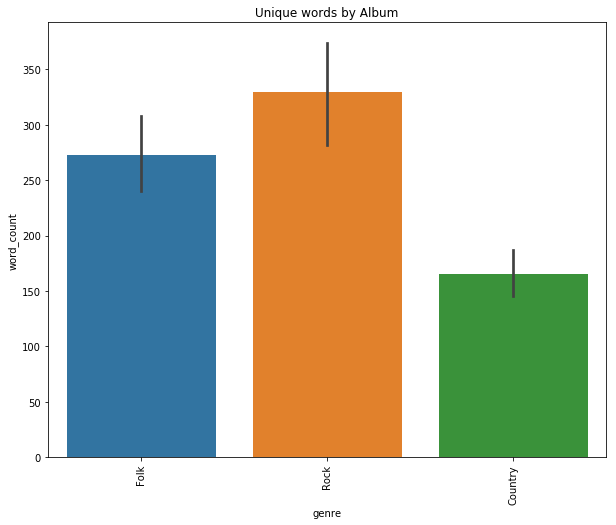

In [135]:
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x='genre', y = 'word_count', data=dylan_df, ax=ax, order=["Folk","Rock","Country"])
ax.set_title("Unique words by Album")
plt.xticks(rotation=90)

In [136]:

combined.to_pickle('./dylan/corpus_combined.pkl')